In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import geopandas as gpd
import geodatasets


# Full Data Frame
Heres the unedited data frame that i used for this project.

In [4]:
df = pd.read_csv('acquisitions_update_2021 (1).csv')

df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


# 0. List of comapnies in this dataset

In [5]:
Parent_companies = df.groupby('Parent Company').size()
Parent_companies

Parent Company
Adobe          52
Amazon        108
Apple         123
Blackberry     32
Citrix         52
Disney         19
Ebay           63
Facebook       93
Google        244
Hp            129
Ibm           182
Microsoft     258
Redhat         35
Twitter        65
dtype: int64

# 1. Top Companies Making Acquisistions

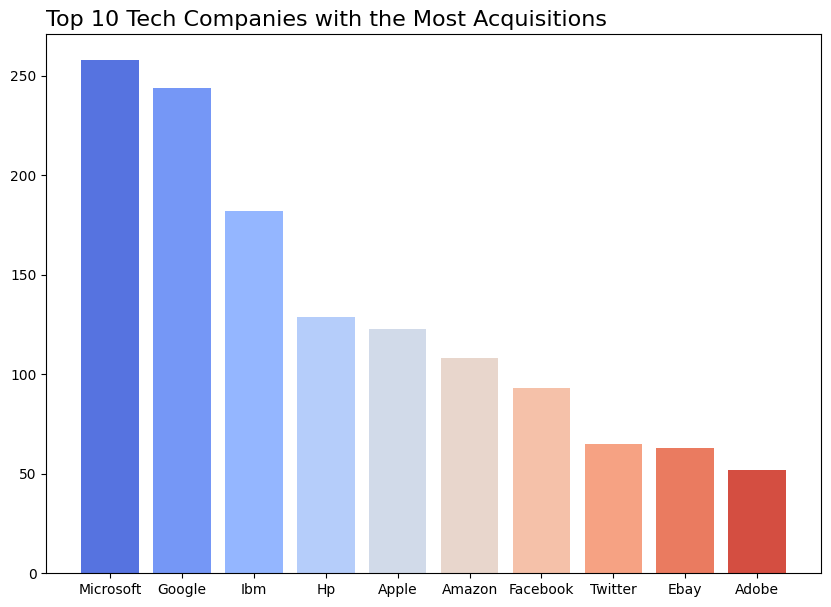

In [6]:
#Question 1: What were the top companies making aquisistions

# Group by 'Parent Company' and count the number of occurrences in each group
top_companies_count = df.groupby('Parent Company').size().reset_index(name='Count')
# Sort the df by largest to smallest ammount of acquisitions
top_companies_sorted = top_companies_count.sort_values(by='Count', ascending=False).reset_index()
top_companies_sorted.head(10)
# Define top 10 companies
company_name = top_companies_sorted['Parent Company'].head(10)
mergers_and_aqu = top_companies_sorted['Count'].head(10)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(company_name, mergers_and_aqu, color=colors)

# Add Title
plt.title('Top 10 Tech Companies with the Most Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()

In [7]:
# Finding the first year in the data set
years = df.groupby('Acquisition Year').size().reset_index(name = 'Count').drop(0)
years

# Find the lowest year
lowest_year = years['Acquisition Year'].min()
print(f"The lowest year in the dataset is: {lowest_year}")

The lowest year in the dataset is: 1957


## Top Acquisitions Observations
From the data we can observe the top companies doing acquisitions amoung our tech companies with Microsoft in the lead with 250+ companies acquired since 1957.

# 2. Relationship Between Acquisitions and Years

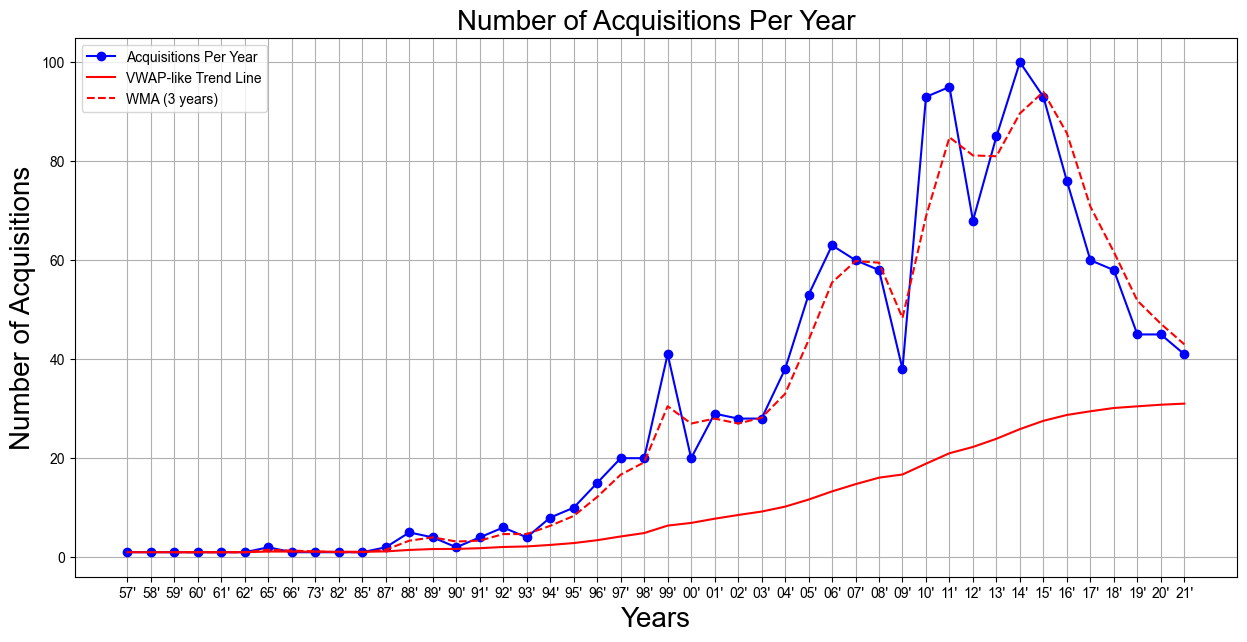

In [8]:
# Prepare the data
Aqu_per_year = df.groupby('Acquisition Year').size().reset_index(name='count').drop(0).reset_index()
Aqu_per_year['YearLabel'] = Aqu_per_year['Acquisition Year'].astype(str).str[-2:]

# Define a function to calculate WMA
def weighted_moving_average(values, window):
    weights = np.arange(1, window + 1)
    wma = np.convolve(values, weights[::-1], mode='valid') / weights.sum()
    return np.concatenate((np.full(window - 1, np.nan), wma))

# Create the plot and save it to a variable
def create_acquisition_plot():
    plt.figure(figsize=(15, 7))
    plt.plot(Aqu_per_year['YearLabel'] + "'", Aqu_per_year['count'], marker='o', linestyle='-', color='b', label='Acquisitions Per Year')
    
    # Calculate cumulative sums and VWAP
    Aqu_per_year['CumulativeAcquisitions'] = Aqu_per_year['count'].cumsum()
    Aqu_per_year['CumulativeYears'] = np.arange(1, len(Aqu_per_year) + 1)
    Aqu_per_year['VWAP'] = Aqu_per_year['CumulativeAcquisitions'] / Aqu_per_year['CumulativeYears']
    
    # Plot VWAP-like trend line
    plt.plot(Aqu_per_year['YearLabel'] + "'", Aqu_per_year['VWAP'], linestyle='-', color='r', label='VWAP-like Trend Line')
    
    # Calculate WMA
    window_size = 3
    Aqu_per_year['WMA'] = weighted_moving_average(Aqu_per_year['count'], window_size)
    
    # Plot WMA trend line
    plt.plot(Aqu_per_year['YearLabel'] + "'", Aqu_per_year['WMA'], linestyle='--', color='r', label=f'WMA ({window_size} years)')
    
    # Add titles and labels
    plt.title('Number of Acquisitions Per Year', fontsize=20)
    plt.xlabel('Years', fontsize=20)
    plt.ylabel('Number of Acquisitions', fontsize=20)
    
    # Show grid and legend
    plt.grid(True)
    plt.legend()
    sns.set_style("whitegrid")
    
    # Return the plot object
    return plt

# Create the plot and save the plot object
acquisition_plot = create_acquisition_plot()

# Show the plot
acquisition_plot.show()


## Acquisition Boom and Cool-Off
Throughout the years we can observe that the trend of these companies making acquisitions has increased substantially since 1998, peaking in 2014. The current trend of these companies making acquisitions is currently on a decline with around 40 per year.

# 3. Most Reoccuring Types of Businesses Acquired

In [9]:
# Correct path to the new image on your Desktop
image_path = 'vecteezy_solid-cloud-illustration-glyph-icon_5502367.jpg'

# Load the image
cloud_mask = np.array(Image.open(image_path))

#cloud_mask

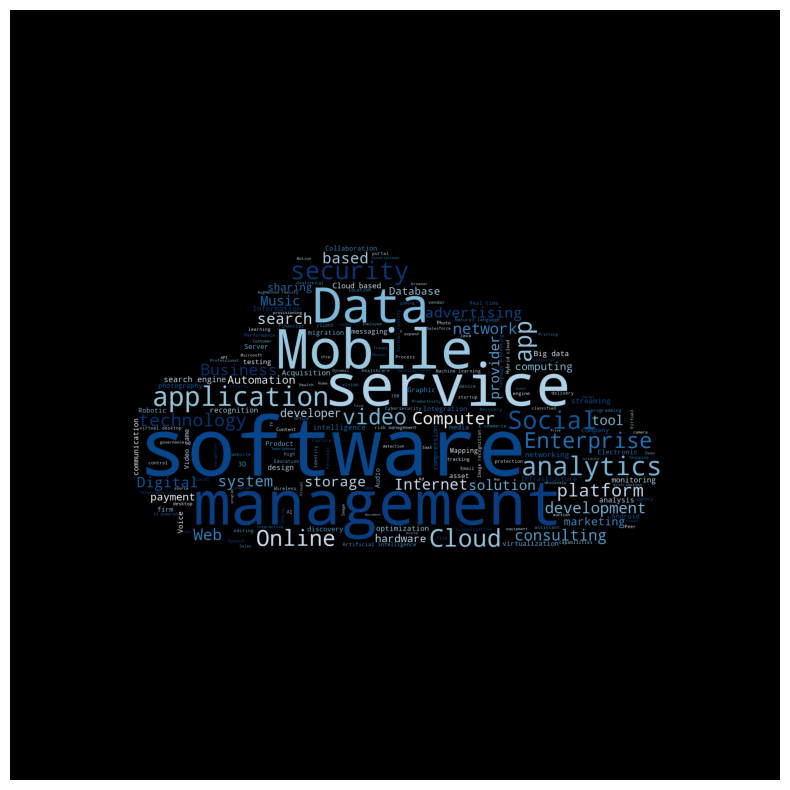

In [10]:
# Question 3: Most reoccuring types of businesses
words = df.groupby('Business').size().reset_index(name='Count').drop(1)
word_count = words.sort_values(by='Count', ascending=False).reset_index()
word = word_count['Business']
word

# Convert the 'Business' column into a single string of words
words_string = ' '.join(word_count['Business'])



wc = WordCloud(mask = cloud_mask,background_color='black', colormap = 'Blues',width = 3000, height = 2500).generate(words_string)
plt.figure(figsize=(12, 10)) 
plt.axis("off")
plt.imshow(wc)

## Acquisition Decision
The Top types of companies aquired have to do with software, managment, mobile, and service to name a few.

# 4. Popular Months for Acquisitions

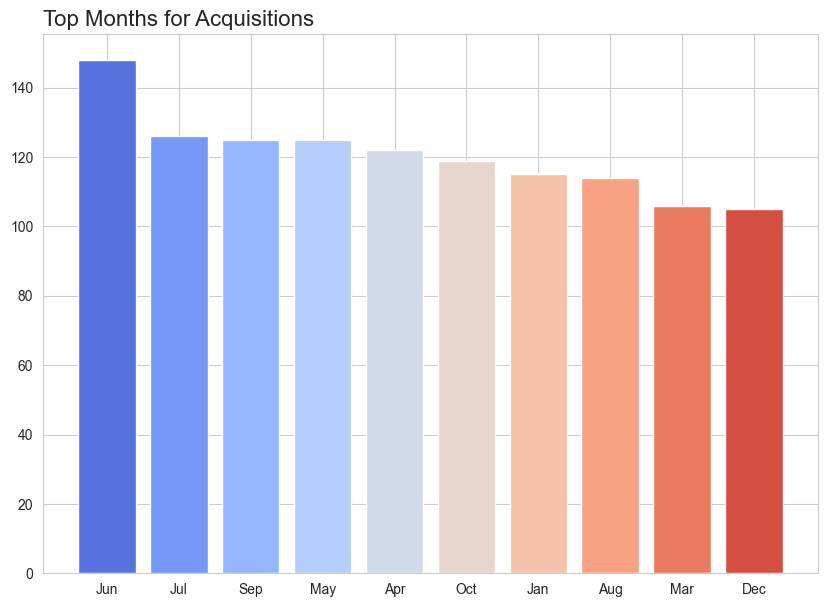

In [11]:
df
months = df.groupby('Acquisition Month').size().reset_index(name='Count').sort_values(by='Count', ascending=False).drop(0)
months

month = months['Acquisition Month'].head(10)
acquis = months['Count'].head(10)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(month, acquis, color=colors)

# Add Title
plt.title('Top Months for Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()

In [12]:
#months['Season'] = 0
def SeasonClassify(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    else:
        return 'Unknown' 
    
months['Season'] = months['Acquisition Month'].apply(SeasonClassify)
months

,Acquisition Month,Count,Season
7,Jun,148,Summer
6,Jul,126,Summer
12,Sep,125,Fall
9,May,125,Spring
1,Apr,122,Spring
11,Oct,119,Fall
5,Jan,115,Winter
2,Aug,114,Summer
8,Mar,106,Spring
3,Dec,105,Winter


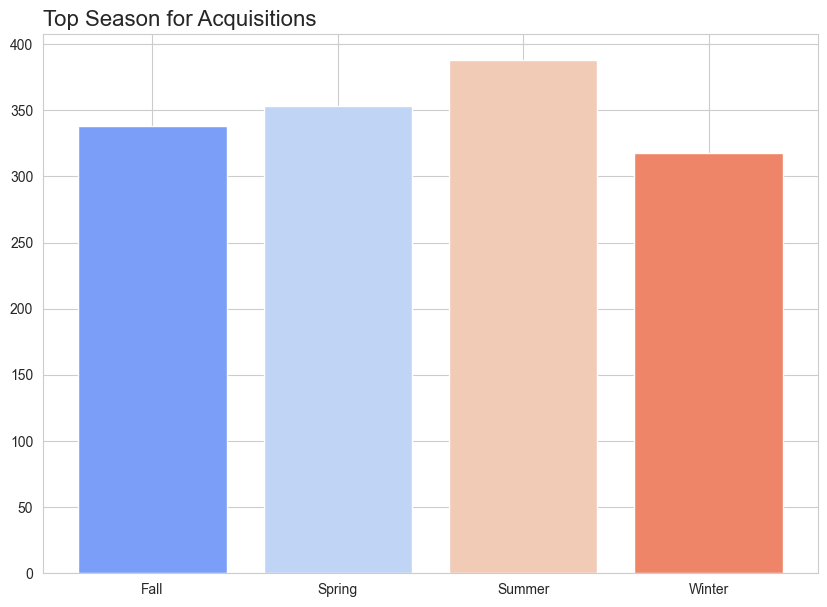

,Acquisition Month,Count,Season
Season,,,
Fall,SepOctNov,338,Fall
Spring,MayAprMar,353,Spring
Summer,JunJulAug,388,Summer
Winter,JanDecFeb,318,Winter


In [13]:
season_acquis = months.groupby('Season').sum()
season_acquis['Season'] = ('Fall', 'Spring', 'Summer', 'Winter')
season =  season_acquis['Season'].head(4)
acquis_per_season = season_acquis['Count'].head(4)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Use seaborn color palette
colors = sns.color_palette('coolwarm', len(season))

# Horizontal Bar Plot
bars = plt.bar(season, acquis_per_season, color=colors)

# Add Title
plt.title('Top Season for Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()
season_acquis 

## Acquisitions Heating Up
Acquisitions peak season is the summer while the least aqcuisitions occur during the winter.

# 5. Which Country Produces the Most Acquisitions?

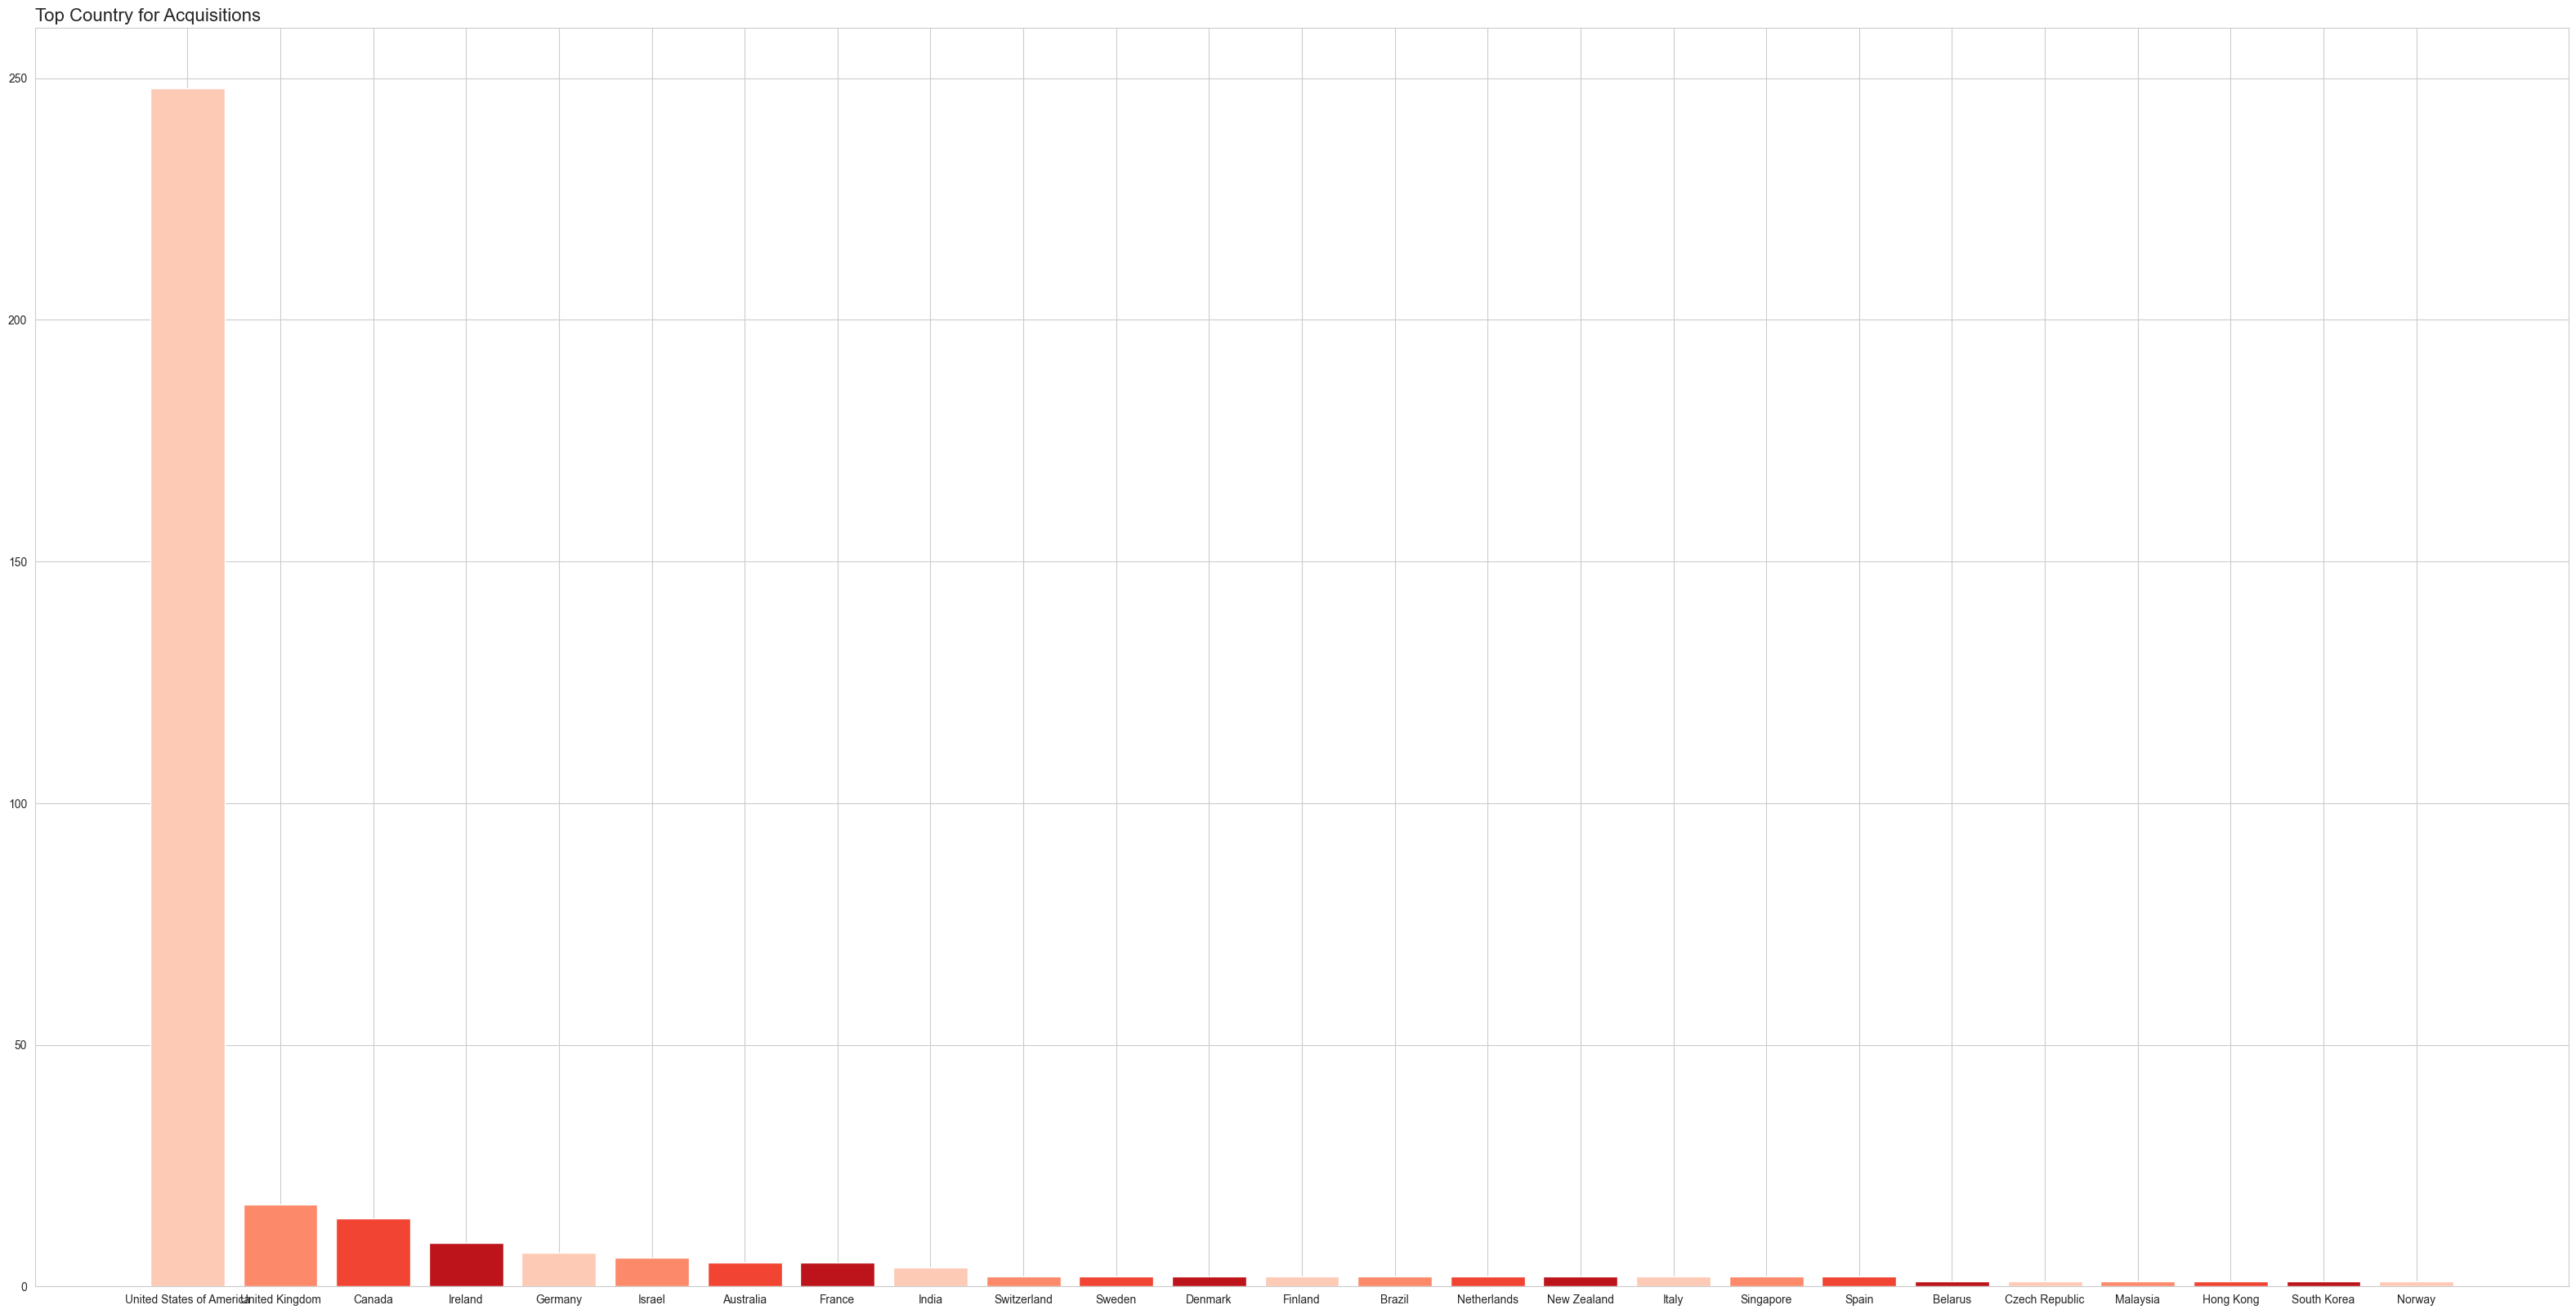

,Country,Count
25,United States of America,248
24,United Kingdom,17
4,Canada,14
12,Ireland,9
9,Germany,7


In [45]:
# Question 5: Which country makes the most aquisitions
countries = df.groupby('Country').size().reset_index(name = 'Count').drop(0)
sorted_countries = countries.sort_values(by='Count', ascending=False)
# Change the name of the US to the maps name for the US
sorted_countries.loc[sorted_countries['Country'] == 'United States', 'Country'] = 'United States of America'
sorted_countries
# Figure Size
fig = plt.figure(figsize =(40, 20))

# Use seaborn color palette
colors = sns.color_palette('Reds', len(season))

# Horizontal Bar Plot
bars = plt.bar(sorted_countries['Country'], sorted_countries['Count'], color=colors)

# Add Title
plt.title('Top Country for Acquisitions', loc='left', fontsize=16)

# Show Plot
plt.show()
sorted_countries.head(5)

![alt text](download-1.png)

## United States the Dominate Force of Acquiring
As we can tell from the heat map above, our specific companies like to Acquire American companies. It is also note worthy that even if youre company is not based in the US, you can still be considered for acquisition. 

# 6. History of Prices Paid for Companies

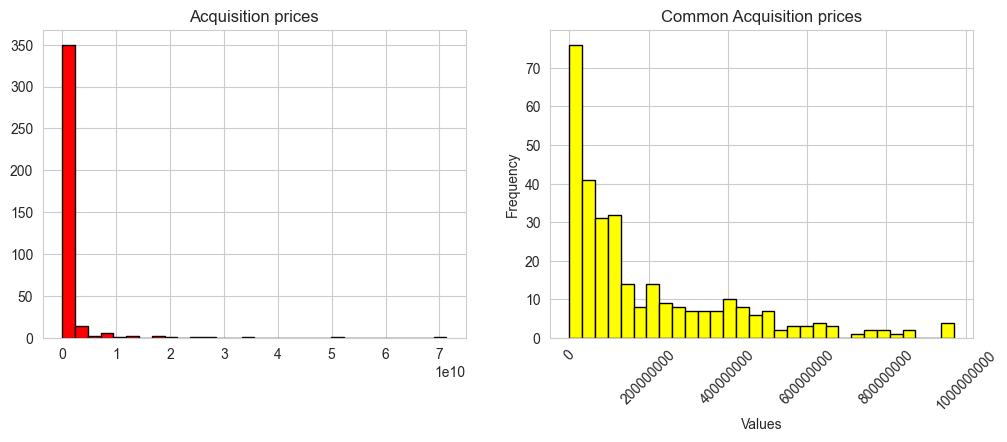

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1402,1403,Disney,2019,Mar,21st Century Fox,-,-,7.130000e+10,-,-


In [36]:
# Question 6: Histogram of Prices paid for the companies
df
# Convert the 'Acquisition Price' column to numeric values
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')
# Filter out undisclosed Acquisition prices
filtered_acquisition_prices = df[(df['Acquisition Price'] > 0)]
frequent_prices = df[(df['Acquisition Price'] > 0) & (df['Acquisition Price'] < 1000000000)]
#Create List for Prices
price = filtered_acquisition_prices['Acquisition Price'].tolist()
freq_prices = frequent_prices['Acquisition Price'].tolist()

# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(price, bins=30, color='Red', edgecolor='black')
axes[0].set_title('Acquisition prices')
 
axes[1].hist(freq_prices, bins=30, color='Yellow', edgecolor='black')
axes[1].set_title('Common Acquisition prices')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Prevent scientific notation on the x-axis
plt.ticklabel_format(style='plain', axis='x')
 
# Display the plot
plt.show()
df[(df['Acquisition Price'] > 0) & (df['Acquisition Price'] > 70000000000)]

## The Cost of Acquiring
The most common price tag of companies is not too aparent in the first histogram but it does tell us that most acquisitions are bought for less than 1.0e+09 or 1 billion dollars. To get a better picture of the prices I removed the outliers from our graph and only focused on the companies valued at sub 1 billion. **Most acquisitions being bought for less than 600 million dollars.** The highest valued company reaching a whopping **71 billion dollar valuation.** That was **21st Century Fox** acquired by **Disney**.

# 7. Portfolio Exploration Microsoft

C:\Users\Roberto Echeverria\AppData\Local\Temp\ipykernel_47456\3253275926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Microsoft['Acquisition Year'] = Microsoft['Acquisition Year'].astype(int)


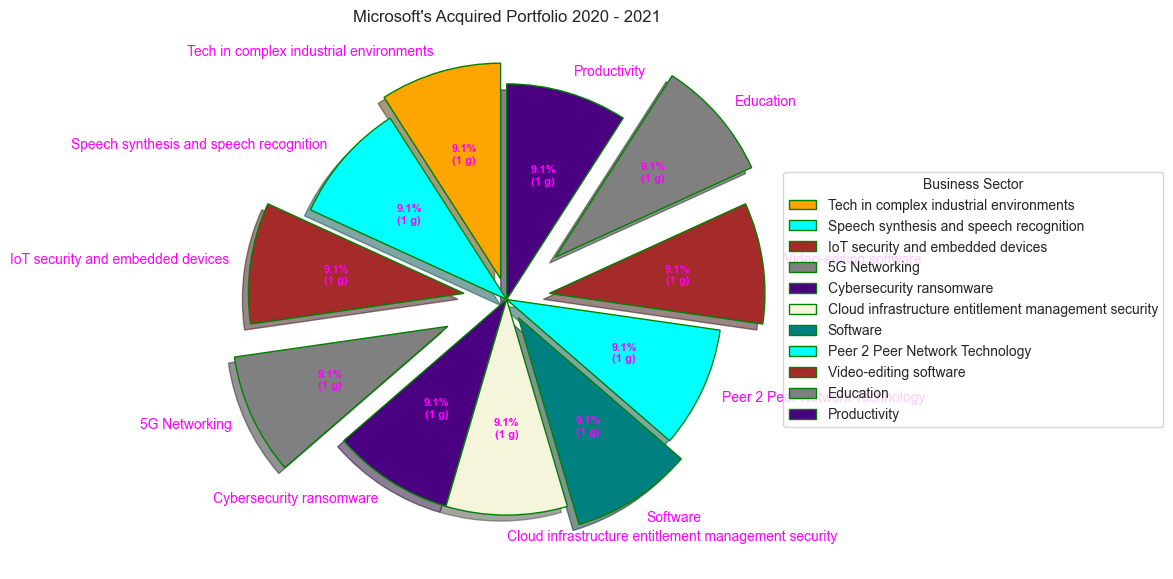

In [37]:
df
Microsoft = df[df['Parent Company'] == 'Microsoft']
Microsoft['Acquisition Year'] = Microsoft['Acquisition Year'].astype(int)
Microsoft
filtered_df = Microsoft[Microsoft['Acquisition Year'] > 2020]
filtered_df
list_companies = filtered_df['Business'].tolist()
list_companies
busin = []
for i in list_companies:
    busin.append(1)

# Creating dataset
sector = list_companies

data = busin


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1, 0.0, 0.2, 0.3, 0.0)

# Creating color parameters
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige",
         "teal", "cyan", "brown",
          "grey", "indigo")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=sector,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta"))

# Adding legend
ax.legend(wedges, sector,
          title="Business Sector",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Microsoft's Acquired Portfolio 2020 - 2021")

# show plot
plt.show()

## There is an even split of different sectors in Microsofts acquisitions from 2020 - 2021.

# 8. Portfolio Exploration Google

C:\Users\Roberto Echeverria\AppData\Local\Temp\ipykernel_47456\1525731021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Google['Acquisition Year'] = Google['Acquisition Year'].astype(int)


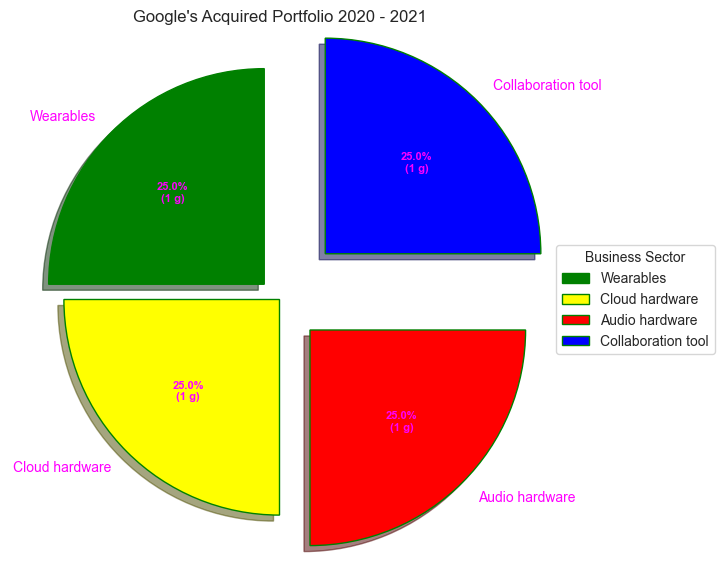

In [38]:
df
Google = df[df['Parent Company'] == 'Google']
Google['Acquisition Year'] = Google['Acquisition Year'].astype(int)
Google
filtered_gdf = Google[Google['Acquisition Year'] > 2020]
filtered_gdf
list_gcompanies = filtered_gdf['Business'].tolist()
list_gcompanies
gbusin = []
for i in list_gcompanies:
    gbusin.append(1)
gbusin
# Creating dataset
sector = list_gcompanies

data = gbusin


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)

# Creating color parameters
colors = ("green", "yellow", "red",
          "blue")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=sector,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta"))

# Adding legend
ax.legend(wedges, sector,
          title="Business Sector",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Google's Acquired Portfolio 2020 - 2021")

# show plot
plt.show()

## Not many acquisitions from Google from 2020 - 2021.

# 9. Portfolio Exploration Apple

C:\Users\Roberto Echeverria\AppData\Local\Temp\ipykernel_47456\2682780534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple['Acquisition Year'] = Apple['Acquisition Year'].astype(int)


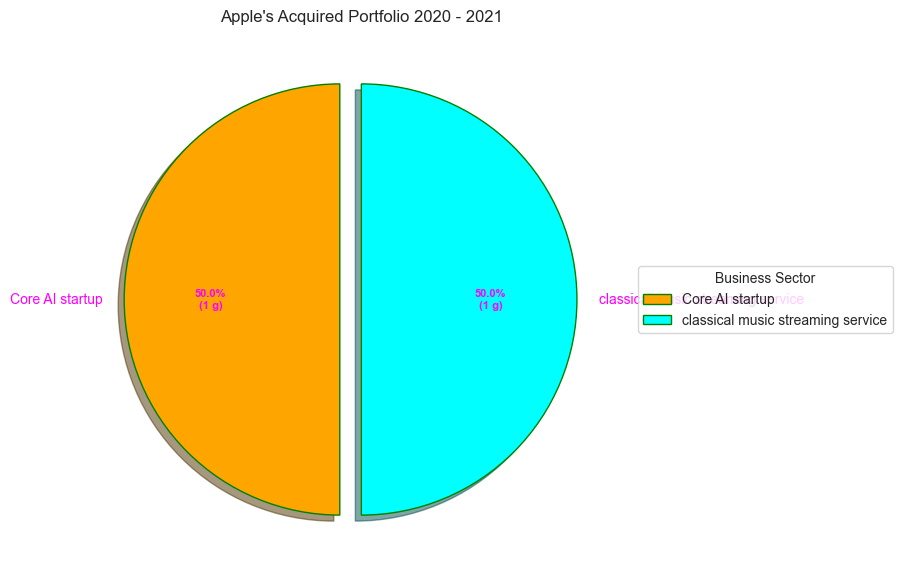

In [39]:
df
Apple = df[df['Parent Company'] == 'Apple']
Apple['Acquisition Year'] = Apple['Acquisition Year'].astype(int)
Apple
filtered_adf = Apple[Apple['Acquisition Year'] > 2020]
filtered_adf
list_acompanies = filtered_adf['Business'].tolist()
list_acompanies
abusin = []
for i in list_acompanies:
    abusin.append(1)
abusin
# Creating dataset
sector = list_acompanies

data = abusin


# Creating explode data
explode = (0.1, 0.0)

# Creating color parameters
colors = ("orange", "cyan")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=sector,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta"))

# Adding legend
ax.legend(wedges, sector,
          title="Business Sector",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Apple's Acquired Portfolio 2020 - 2021")

# show plot
plt.show()

## Only 2 acquisitions for Apple from 2020 - 2021 and a surprising one, a classical music streaming service!

# 10. Future Acquisition Business Types?

In [40]:
# Ensure the 'Acquisition Year' column is in string format
df['Acquisition Year'] = df['Acquisition Year'].astype(str)

# Filter the DataFrame to keep only rows with numeric 'Acquisition Year'
df_filtered = df[df['Acquisition Year'].apply(lambda x: x.isnumeric())]

# Convert the 'Acquisition Year' column back to integers
df_filtered['Acquisition Year'] = df_filtered['Acquisition Year'].astype(int)

filtered_dff = df_filtered[df_filtered['Acquisition Year'] > 2015]

filtered_dff

# List of core words to match
core_words = ['software', 'hardware', 'AI', 'service', 'network', 'cloud', 'management', 'education', 'Productivity', 'podcasting', 'agency', 'tech', 'platform','security','wearables','peripherals', 'collab', 'recognition','machine learning', 'augmented reality','data', 'mobile', 'analytics', 'app','computer vision','health','artificial intelligence', 'assistant', 'monitoring', 'video games', 'consulting']

def extract_core_word(business_type):
    # Convert to lowercase for case-insensitive matching
    business_type_lower = business_type.lower()
    for word in core_words:
        if word.lower() in business_type_lower:
            return word.capitalize()  # Capitalize the first letter for consistency
    return 'Other'  # Default if no match is found

# Apply the function to the 'Business Type' column
filtered_dff['Core Business'] = filtered_dff['Business'].apply(extract_core_word)


#with pd.option_context('display.max_rows', None):
    #print(filtered_dff['Business'])
grouped_businesses = filtered_dff.groupby(['Core Business']).size().reset_index(name = 'Count').drop(19)
grouped_businesses
#Combine both Ai and Artificial Intelegence rows
grouped_businesses.loc[1, 'Count'] = 18 + 7
grouped_businesses = grouped_businesses.drop(4).sort_values('Count')
grouped_businesses

C:\Users\Roberto Echeverria\AppData\Local\Temp\ipykernel_47456\167420726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Acquisition Year'] = df_filtered['Acquisition Year'].astype(int)
C:\Users\Roberto Echeverria\AppData\Local\Temp\ipykernel_47456\167420726.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dff['Core Business'] = filtered_dff['Business'].apply(extract_core_word)


,Core Business,Count
8,Collab,1
5,Assistant,1
20,Peripherals,1
17,Monitoring,1
30,Wearables,1
22,Podcasting,1
2,Analytics,2
13,Health,2
23,Productivity,2
9,Computer vision,3


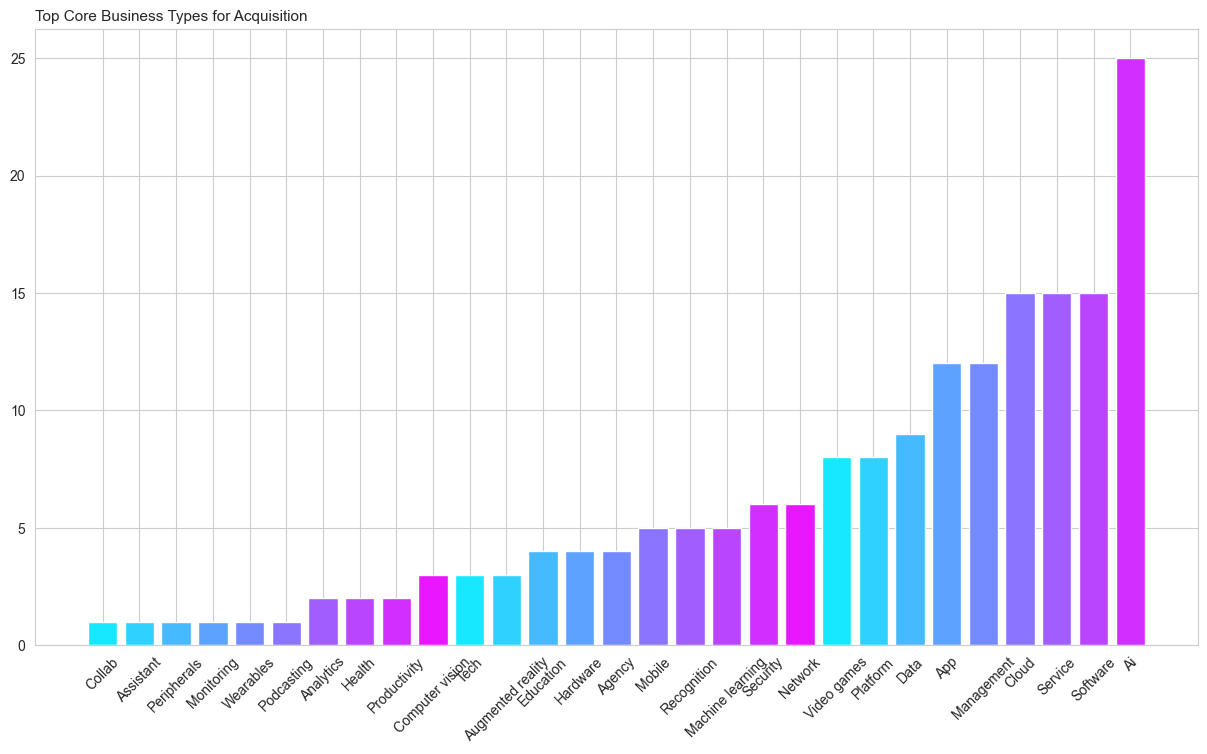

In [41]:
core = grouped_businesses['Core Business']
core_count = grouped_businesses['Count']

# Figure Size
fig = plt.figure(figsize =(15, 8))

# Use seaborn color palette
colors = sns.color_palette('cool', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(core, core_count, color=colors)

# Add Title
plt.title('Top Core Business Types for Acquisition', loc='left', fontsize=11)
plt.xticks(rotation=45)
# Show Plot
plt.show()

## Through the use of sorting the data to find the most common types of core business models that have been acquired, I can see a trend happening. Currently these companies are acquiring AI, Software, Service, Cloud, and Management Companies. Through this graph and the projected amount of companies that should be acquired in the future, I predict this.

# 10+

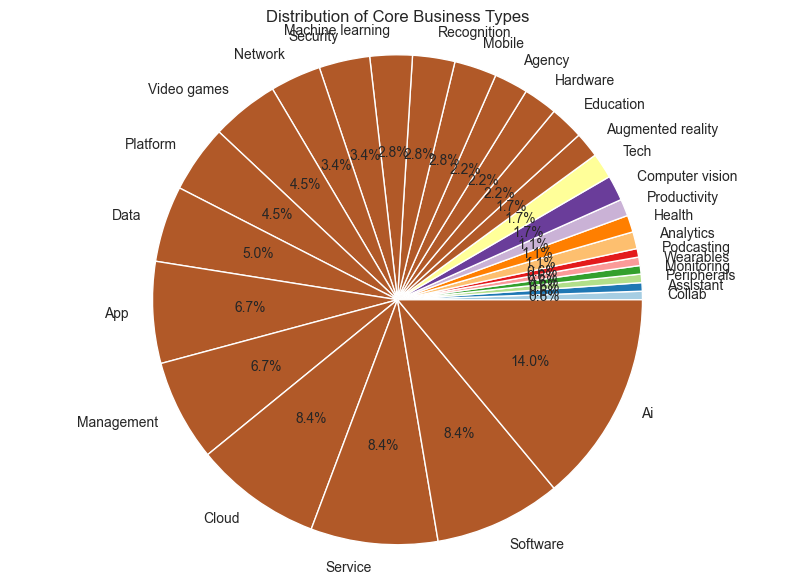

In [42]:
plt.figure(figsize=(10, 7))
plt.pie(core_count, labels=core, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(core))))
plt.title('Distribution of Core Business Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

![alt text](download.png)

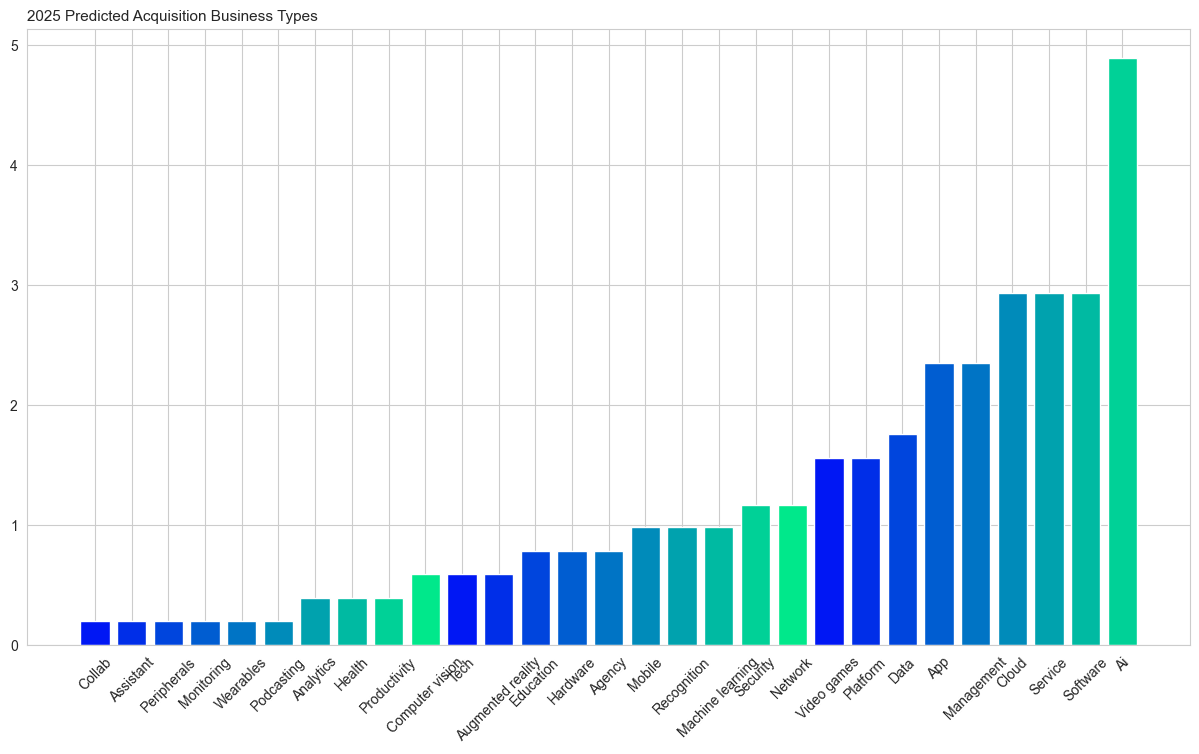

In [43]:
# Calculate the total number of businesses
total_count = grouped_businesses['Count'].sum()

# Calculate percentage of each core business type relative to total count
grouped_businesses['Percentage'] = (grouped_businesses['Count'] / total_count).round(4)  # Round to 4 decimal places

# Scale the percentages to a hypothetical number of 35 companies
scaled_companies = 35
grouped_businesses['Scaled Count'] = (grouped_businesses['Percentage'] * scaled_companies).round(2)  # Round to 2 decimal places

# Display the new DataFrame
grouped_businesses

core = grouped_businesses['Core Business']
core_count = grouped_businesses['Scaled Count']

# Figure Size
fig = plt.figure(figsize =(15, 8))

# Use seaborn color palette
colors = sns.color_palette('winter', len(company_name))

# Horizontal Bar Plot
bars = plt.bar(core, core_count, color=colors)

# Add Title
plt.title('2025 Predicted Acquisition Business Types', loc='left', fontsize=11)
plt.xticks(rotation=45)
# Show Plot
plt.show()

## Predicted number of Acquisitions in 2025 - About 35 by looking at the trend lines. Then I multiply the number of companies by the % of business types in the pie chart. For Ai - 14% of those 35 companies will be Ai Acquisitions, or about 5 of them.

In [14]:
# Question 1: What were the top companies making aquisistions 
# Question 2: Relationship between aquisitions and years
# Question 3: Most reoccuring word in types of businesses
# Question 4: What months do these deals happen the most
# Question 5: Which country makes the most aquisitions
# Question 6: Histogram of Prices paid for the companies
# Question 7: Portfolio of Microsoft?
# Question 8: Portfolio of Google?
# Question 9: Portfolio of Apple?
# Question 10: What types of companies will be acquired in the future?
